In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from potters import plot_df
from get_turn import plot_changepoints, load_turnandrise_from_zarr
from path_prefix import PATH_PREFIX

In [4]:
df = pd.read_csv(f'{PATH_PREFIX}/data/osstate/extracted/states_2022-04-04-00.csv.gz', compression='gzip')
df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1649030400,7c02dc,-37.662643,145.395053,50.857154,38.840837,5.20192,AUM,False,False,False,4001.0,1615.44,1676.40,1.649030e+09,1.649030e+09
1,1649030400,4bcda5,51.315422,13.289487,212.396729,305.035400,NaN,SXS8VH,False,False,False,3212.0,12192.00,11818.62,1.649030e+09,1.649030e+09
2,1649030400,4bcc67,52.009878,10.625668,222.004883,123.469849,NaN,THY4RK,False,False,False,7601.0,7978.14,7795.26,1.649030e+09,1.649030e+09
3,1649030400,4bb467,51.396189,11.958468,136.096680,240.820312,NaN,MNB9346,False,False,False,3606.0,2628.90,2583.18,1.649030e+09,1.649030e+09
4,1649030400,4520c4,51.117604,6.894822,229.352295,258.612671,NaN,BCS55G,False,False,False,1000.0,10195.56,9989.82,1.649030e+09,1.649030e+09


In [10]:
# Open a ZARR file
ident = 'SWA2486_abc80c'
print(f'Opening {PATH_PREFIX}/data/osstate/routes/states_2022-04-04-00/{ident}.zarr')
turning_points = load_turnandrise_from_zarr(f'{PATH_PREFIX}/data/osstate/routes/states_2022-04-04-00/{ident}.zarr')

Opening /Users/thinhhoang/Documents/XFD/data/osstate/routes/states_2022-04-04-00/SWA2486_abc80c.zarr


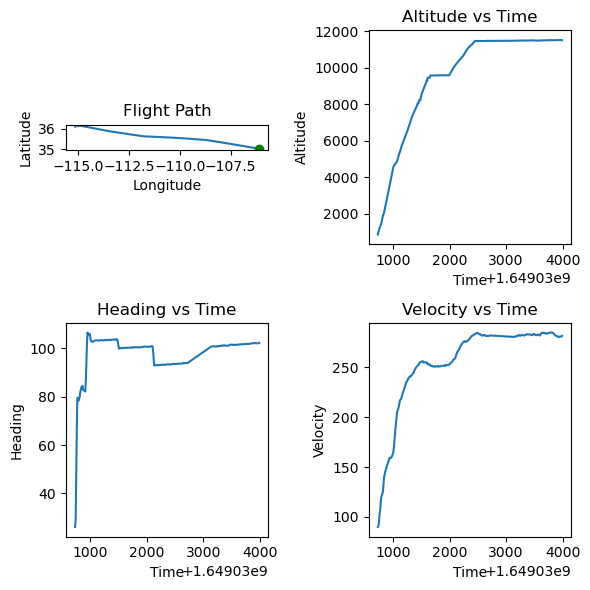

In [11]:
plot_df(df, ident)

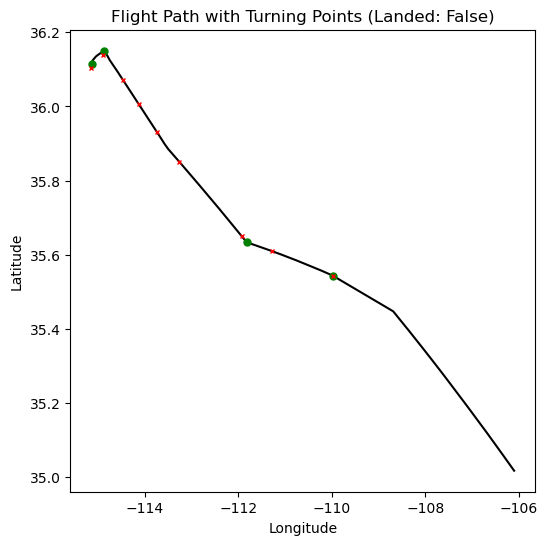

In [12]:
plot_changepoints(turning_points, df, ident)

In [13]:
turning_points

{'dp_alt': array([  853.44,  3211.83,  5478.78,  6713.22,  7917.18,  9235.44,
        10050.78, 10972.8 , 11483.34]),
 'dp_lat': array([36.10441589, 36.1384964 , 36.07264709, 36.00689904, 35.92987061,
        35.85146112, 35.64975027, 35.60934448, 35.54375083]),
 'dp_lon': array([-115.14993668, -114.89928246, -114.47845459, -114.13561882,
        -113.73962402, -113.27190643, -111.92976282, -111.27479553,
        -109.98506587]),
 'dp_time': array([1.64903073e+09, 1.64903091e+09, 1.64903113e+09, 1.64903127e+09,
        1.64903142e+09, 1.64903159e+09, 1.64903208e+09, 1.64903230e+09,
        1.64903272e+09]),
 'dp_vel': array([0.08995859, 0.15249906, 0.21774598, 0.23907425, 0.25092056,
        0.25500704, 0.25818991, 0.27617355, 0.28204389]),
 'tp_alt': array([ 1059.18,  3406.14, 10226.04, 11483.34]),
 'tp_lat': array([36.11536634, 36.15023804, 35.63337708, 35.54375083]),
 'tp_lon': array([-115.13857994, -114.87533569, -111.81364059, -109.98506587]),
 'tp_time': array([1.64903075e+09, 1.